In [1]:
%load_ext autoreload
import time
from importlib import reload

""" *********************************************************************************************************************************** """
# MONGODB
from pymongo import MongoClient
from bson import  ObjectId
#Ploting
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Data and processing
import datetime
import numpy as np
import pandas as pd
# Printing
import pprint
# parallel
import os
""" *********************************************************************************************************************************** """
import sys
sys.path.append('git/PRIM/source/')
sys.path.append('git/PRIM/scripts/')

import Trips
import DataProcessing
import Plotting
import TripsProcessing
import OsmProcessing
import speed_matrix 
import CustomUtils
import osmMerger
from speed_matrix import SpeedMatrix
from affect_road_to_point_para import get_north_azimut
""" *********************************************************************************************************************************** """
from mongoConnection import client , coyoteData ,osmWays

%aimport pandas , numpy , matplotlib, seaborn, os, sys, ipyparallel, pprint, folium, datetime
sns.set()

In [12]:
def plotNbMissingSegmentData(data):
    plt.plot(data.isna().sum().values/len(data))
    plt.plot([ x/len(data) if y.date().weekday()>=5 else None for x,y in zip(data.isna().sum(),data.isna().sum().index)],linewidth=2)
    for x in range(0,len(data.columns),12):
        plt.axvline(x,linestyle=':',color='red') 
    plt.legend(['weekdays','weekends','days'])
    plt.ylabel('percentage of segments with no data')
    plt.xticks(range(0,len(data.isna().sum().index),6),data.isna().sum().index[0::6], rotation='vertical');

In [3]:
def plotCorrelationCoefs(data ,xmpID=0):
    plt.figure(figsize=(18,4))
    xmp=np.corrcoef(data.T.values)[xmpID]
    plt.plot(xmp,'-+')
    for x in range(0,len(xmp),12):
        plt.axvline(x,linestyle=':',color='red',alpha=0.5) 
    for x in range(xmpID%12,len(xmp),12):
        plt.axvline(x,linestyle='--',color='green',alpha=0.5) 

In [18]:
df = DataProcessing.loadRawData(coyoteData)

In [4]:
updatedSpeed=pd.read_pickle("updatedSpeed.pckl")
meanUpdatedSpeed=pd.read_pickle("updatedSpeedWithHistoricalValues.pckl")
speeds = pd.read_pickle('/home/dsi/mbouchouia/code/speeds.pckl')

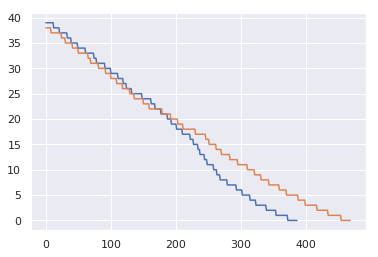

In [6]:
plt.plot(speeds.groupby('matching_road').mean().dropna(thresh = int(0.8*len(speeds.columns))).isna().sum(axis=1).sort_values(ascending=False).values)
plt.plot(updatedSpeed.isna().sum(axis=1).sort_values(ascending=False).values)

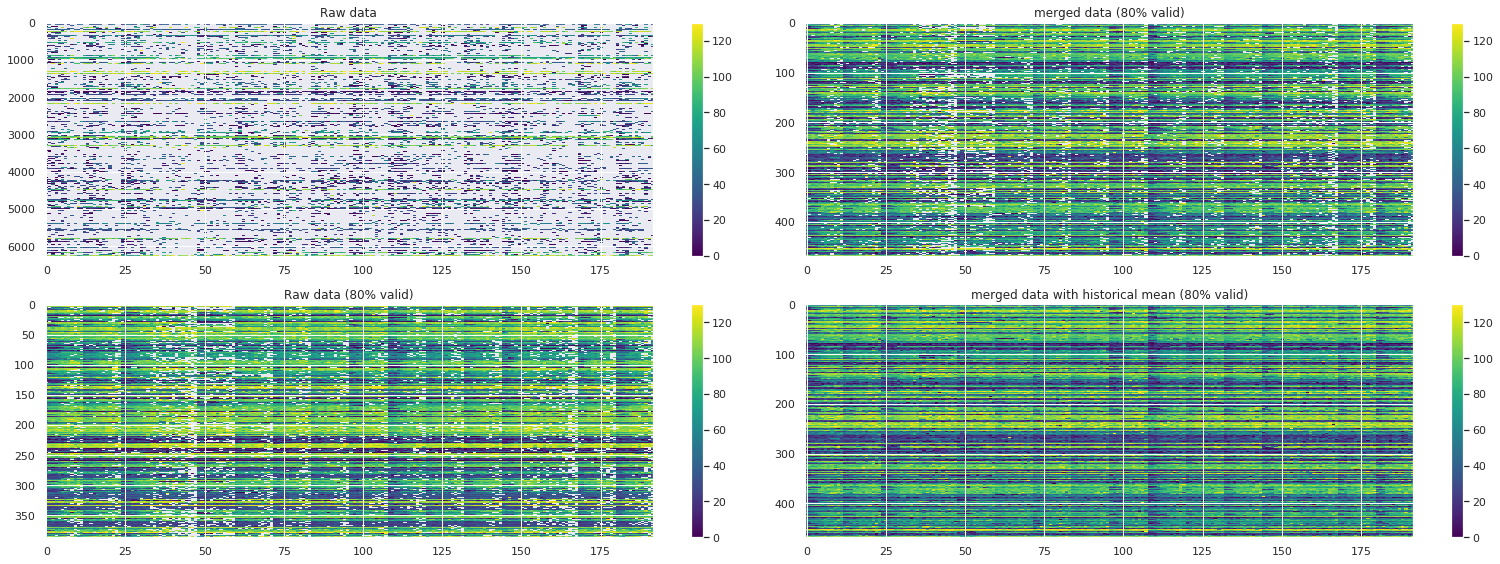

In [516]:
fig=plt.figure(figsize=(22,8))
plt.subplot(2,2,1,title = 'Raw data')
plt.imshow(speeds,aspect='auto',cmap=plt.cm.viridis)

plt.colorbar()
plt.subplot(2,2,3,title = 'Raw data (80% valid)')
plt.imshow(speeds.groupby('matching_road').mean().dropna(thresh = int(0.8*len(speeds.columns))),aspect='auto',cmap=plt.cm.viridis)
plt.colorbar()

plt.subplot(2,2,2,title = 'merged data (80% valid)')
plt.imshow(updatedSpeed.values,aspect='auto',cmap=plt.cm.viridis)
plt.colorbar()
plt.subplot(2,2,4,title = 'merged data with historical mean (80% valid)')
plt.imshow(meanUpdatedSpeed.values,aspect='auto',cmap=plt.cm.viridis)
plt.colorbar()
plt.tight_layout()
plt.show()

'~'/
'access mongoDB.py'*
 counts1419.pckl*
 crawlImages.py*
'DB stats.ipynb'*
 debug.ipynb*
 debug-p2.7.ipynb*
 DEBUG_Trips_OD_Matrix.ipynb*
 distances.html*
 fig1.png*
 git/
 hierarchy.csv*
 hierarchy.pckl*
 home.html*
 iris_OD_Count.png*
 labeledLocations.pkle*
'LSTM Example TensorFlow.ipynb'*
 mergeResults.pckl*
'missing data(14-19) statistics.ipynb'*
'missing data(14-19) statistics no weekends.ipynb'*
'missing data(17-20) statistics.ipynb'*
'Mongo queries debug.ipynb'*
 NewMap.html*
'Old scripts'/
 parallelSegmentAssignation.ipynb*
'pieTrips starting points.png'*
 predictHome.html*
 rawUpdatedSpeed1419.pckl*
 ROA~2IV3.HTM*
 Roads2.html*
 RoadsHist.html*
 RoadsPer10Percents.html*
 ROA~HXV3.HTM*
'Scripts Py (dep)'/
'Segments Data Processing.ipynb'*
 segmentsMeta.pckl*
 segmentsplot.html*
 speeds1419.pckl*
 speeds.pckl*
 steps.html*
 testMultiMap.html*
 testTrips.html*
 tflogs/
'too long trip.html'*
 tripRateEvolution.png*
 tripsClusters.html*
 Trips_OD_Matrix-Copy1.ipynb*
 Trips_OD_

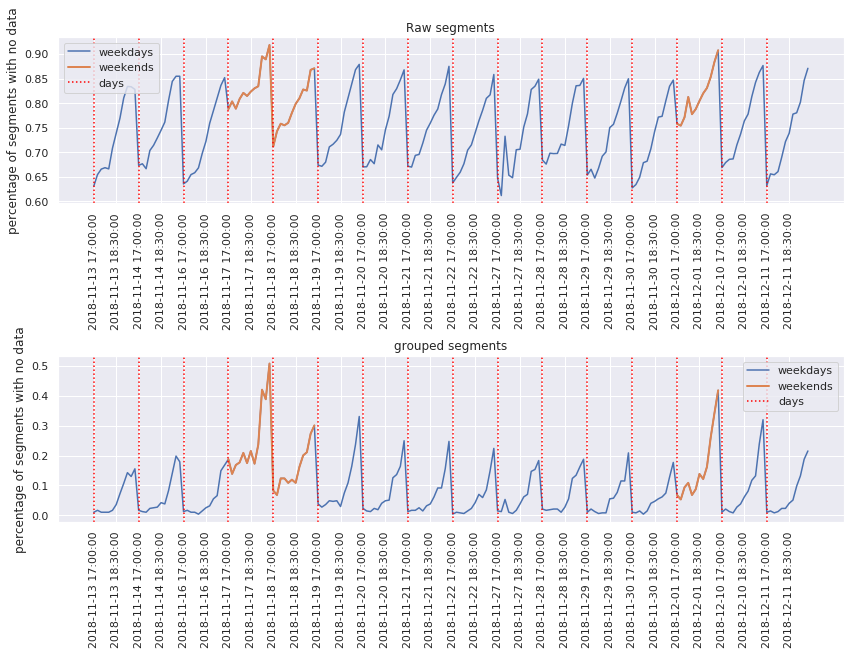

In [17]:
plt.figure(figsize= (12,9))
plt.subplot(2,1,1)
plotNbMissingSegmentData(speeds)
plt.title('Raw segments')
plt.subplot(2,1,2)
plotNbMissingSegmentData(updatedSpeed)
plt.title('grouped segments')
plt.tight_layout()
plt.savefig("imgs/percentage segmentsWithNoData.png",dpi=1200)

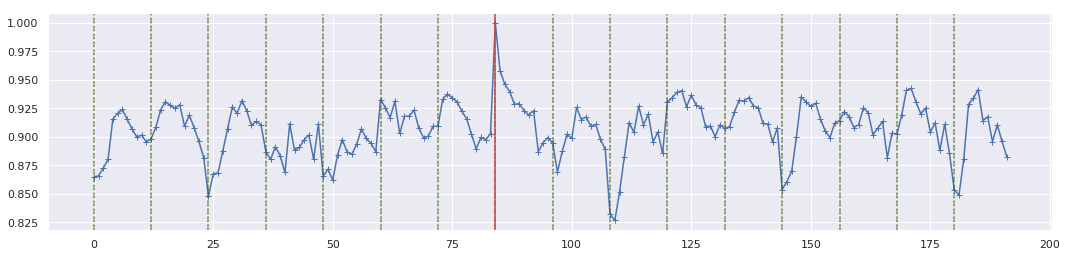

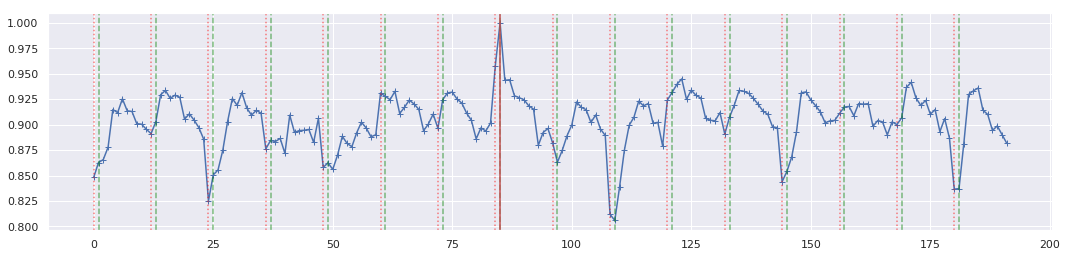

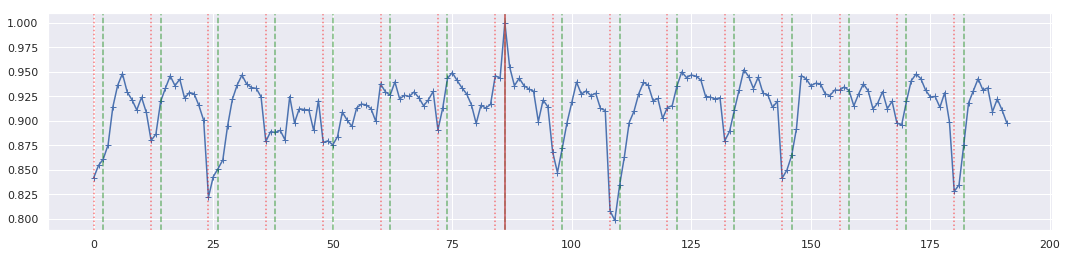

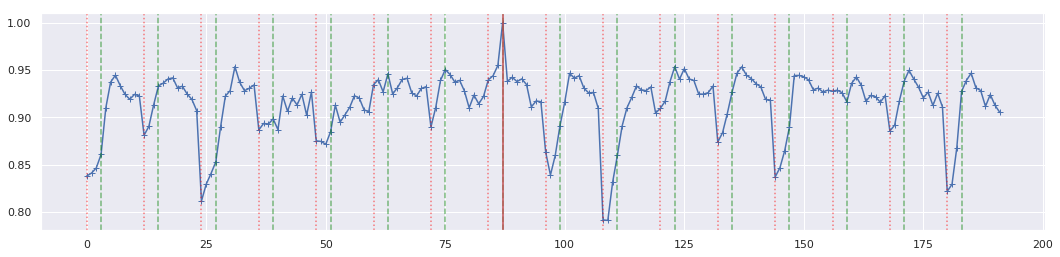

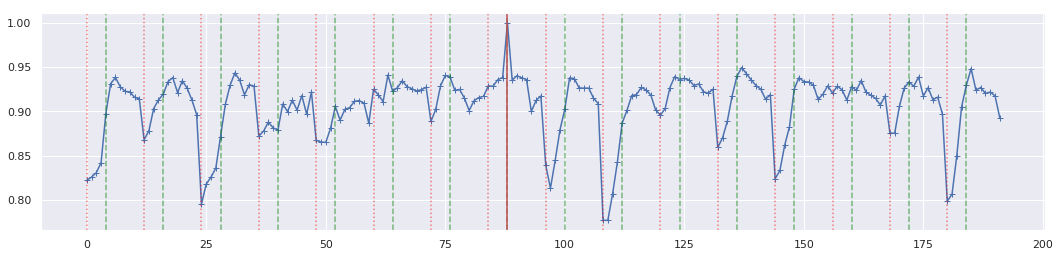

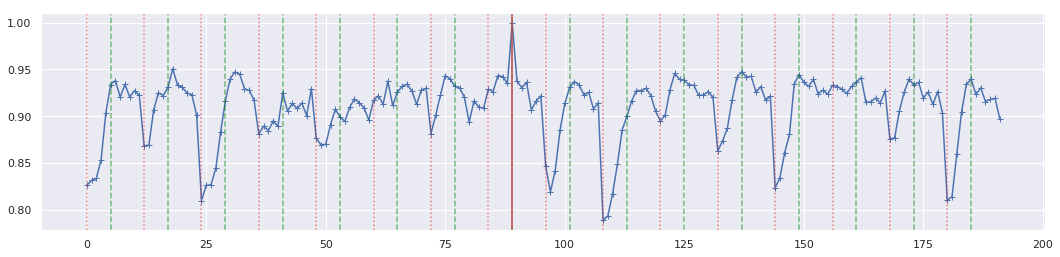

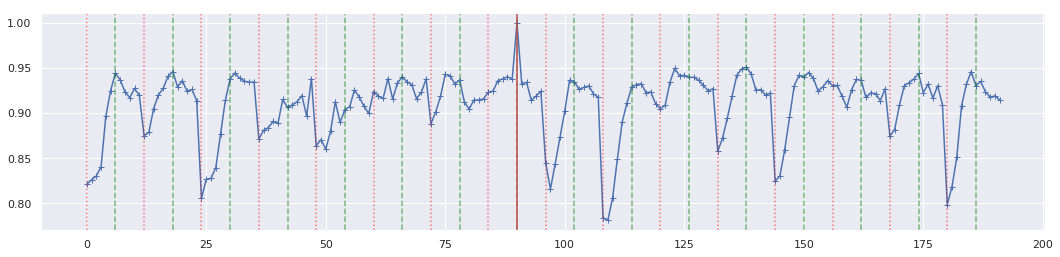

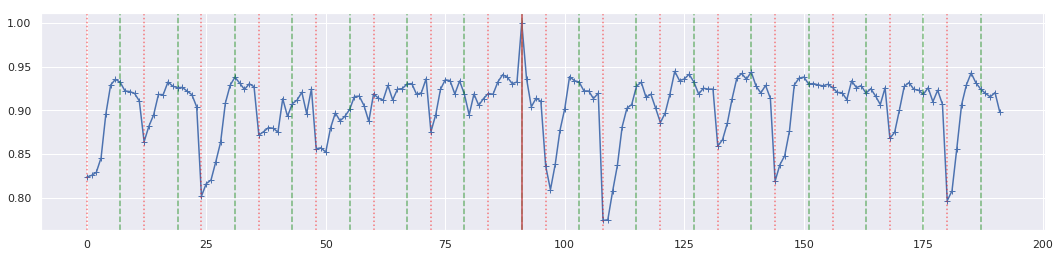

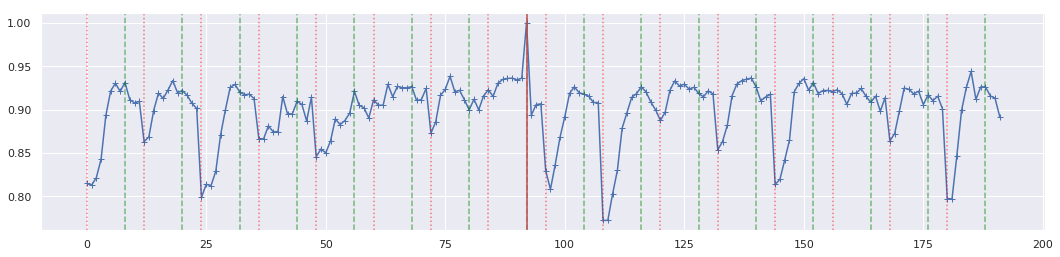

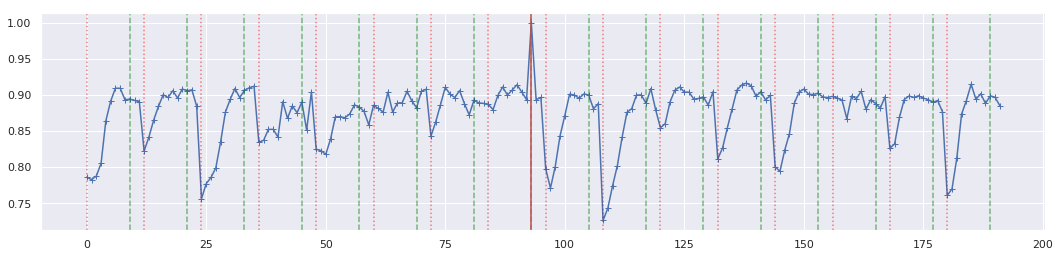

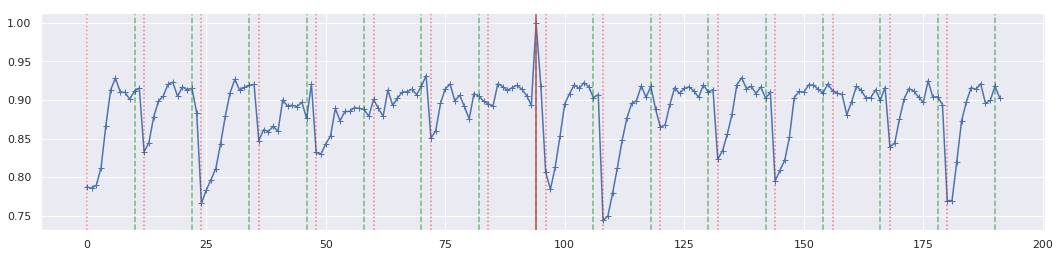

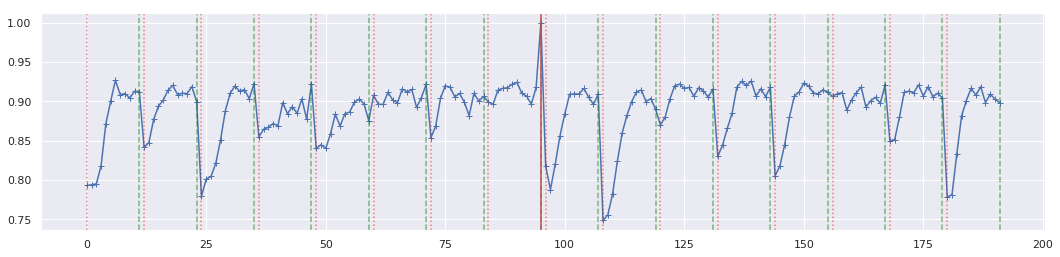

In [524]:
for i in range(12*7,12*8,1):
    plotCorrelationCoefs(meanUpdatedSpeed,i)
    plt.axvline(i,c='r')

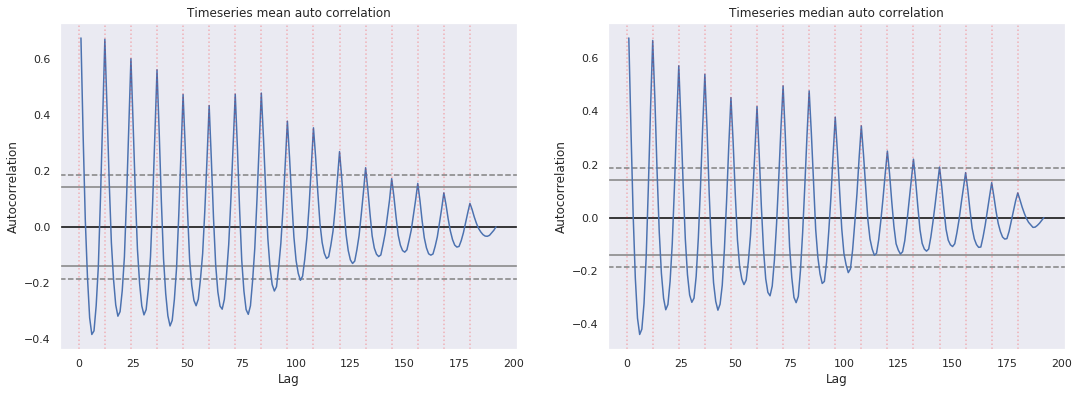

Equation


<IPython.core.display.Latex object>

In [502]:
plt.figure(figsize=(18,6))
pd.plotting.autocorrelation_plot(meanUpdatedSpeed.describe().loc['mean'],ax=plt.subplot(1,2,1))
for x in range(0,len(meanUpdatedSpeed.T),12):
    plt.axvline(x,linestyle=':',color='red',alpha=0.25) 
plt.title('Timeseries mean auto correlation')
pd.plotting.autocorrelation_plot(meanUpdatedSpeed.describe().loc['50%'],ax=plt.subplot(1,2,2))
for x in range(0,len(meanUpdatedSpeed.T),12):
    plt.axvline(x,linestyle=':',color='red',alpha=0.25) 
plt.title('Timeseries median auto correlation')
plt.show()

print("Equation")
Latex(r'$\Large {\hat {R}}(k)={\frac{1}{n\sigma ^{2}}}\sum _{t=1}^{n-k}(X_{t}-\mu )(X_{t+k}-\mu )$')

Text(0.5, 1.0, 'Histogram correlation coefs of rows (segments)')

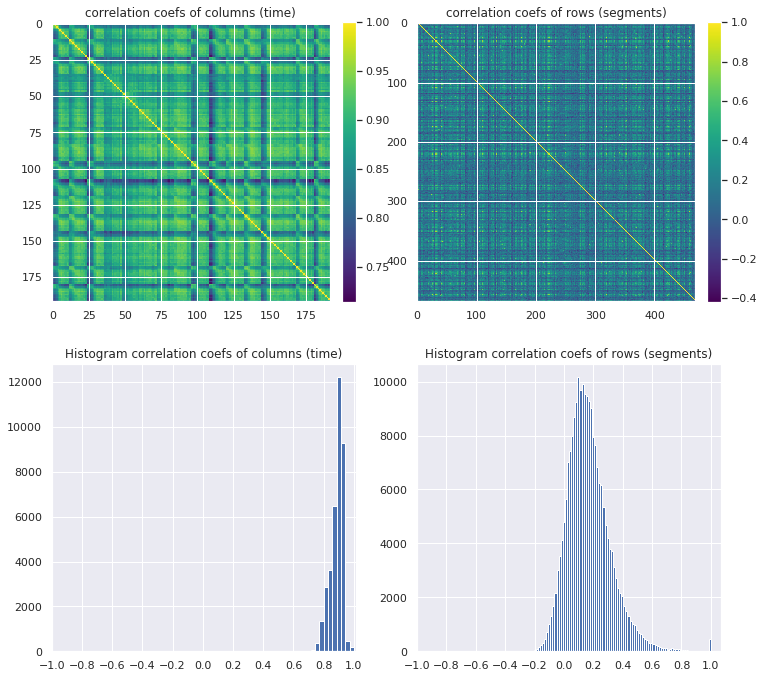

In [501]:
plt.figure(figsize=(12,18))
plt.subplot(3,2,1)
plt.imshow(np.corrcoef(meanUpdatedSpeed.T.values),cmap=plt.cm.viridis)
plt.title("correlation coefs of columns (time)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(3,2,2)
plt.imshow(np.corrcoef(meanUpdatedSpeed.values),cmap=plt.cm.viridis)
plt.title("correlation coefs of rows (segments)")
plt.colorbar( fraction=0.046, pad=0.04)
plt.subplot(3,2,3)
roundedCoefs=np.corrcoef(meanUpdatedSpeed.T.values).round(decimals=3).flatten()

plt.hist(roundedCoefs,bins=10)
plt.xticks(np.arange(-1,1.1,0.2))
plt.title("Histogram correlation coefs of columns (time)")

plt.subplot(3,2,4)
roundedCoefs=np.corrcoef(meanUpdatedSpeed.values).round(decimals=3).flatten()
plt.hist(roundedCoefs,bins=100)
plt.xticks(np.arange(-1,1.1,0.2))
plt.title("Histogram correlation coefs of rows (segments)")

# pd.plotting.autocorrelation_plot(meanUpdatedSpeed.T,plt.subplot(3,2,5))
# for x in range(0,len(meanUpdatedSpeed.T),12):
#     plt.axvline(x,linestyle=':',color='red',alpha=0.25) 
# plt.title("autocorrelation of columns (time)")


# pd.plotting.autocorrelation_plot(meanUpdatedSpeed,plt.subplot(3,2,6))
# plt.title("autocorrelation of rows (segments)")
# plt.tight_layout()

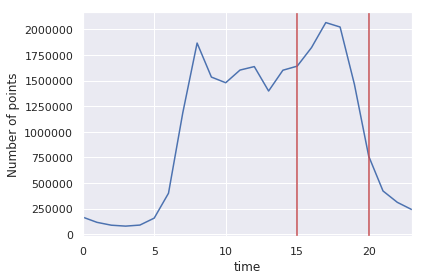

In [26]:
hourCounts=df.groupby(df.time.dt.hour).size()
hourCounts.plot()
plt.axvline(15,c='r')
plt.axvline(20,c='r')
plt.ylabel('Number of points')
plt.tight_layout()
plt.savefig('imgs/Number of points per hour.png',dpi=1200)